<a href="https://colab.research.google.com/github/Krishnateja001/heart_disease_prediction/blob/main/heart_attack_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 


data = pd.read_csv('/content/framingham_heart_disease.csv')
print(data.columns)
data.head(10)
data.dtypes

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [2]:
#NORMALIZATION
# data=(data-data.mean())/data.std()
# data

In [3]:
#education does not play important role 
data=data.drop('education',axis=1)
# cigsperday and currentsmoker are redundant with each other thats why we remove cigs per day columns
data=data.drop('cigsPerDay',axis=1)

In [4]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


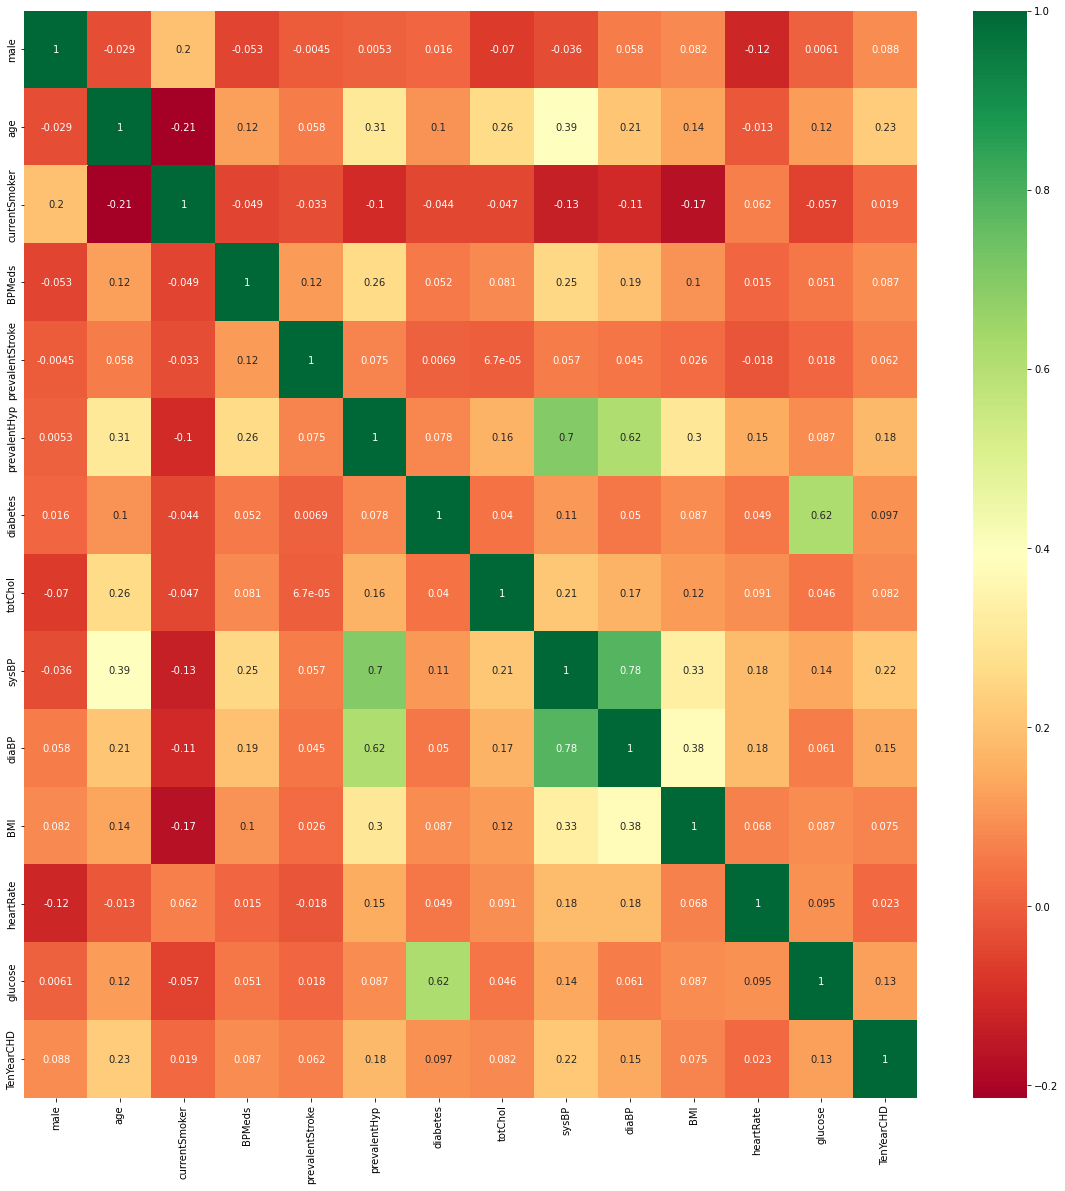

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

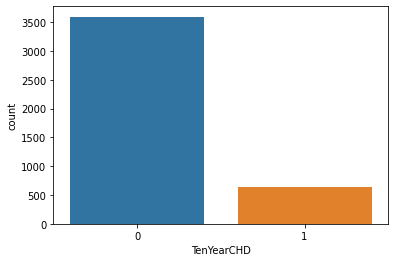

In [6]:
import seaborn as sn

data.TenYearCHD.value_counts()
sn.countplot(x='TenYearCHD',data=data)

<ipython-input-7-19cddfa53e1e>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data.hist(ax = ax)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f359521a2b0>,
      dtype=object)

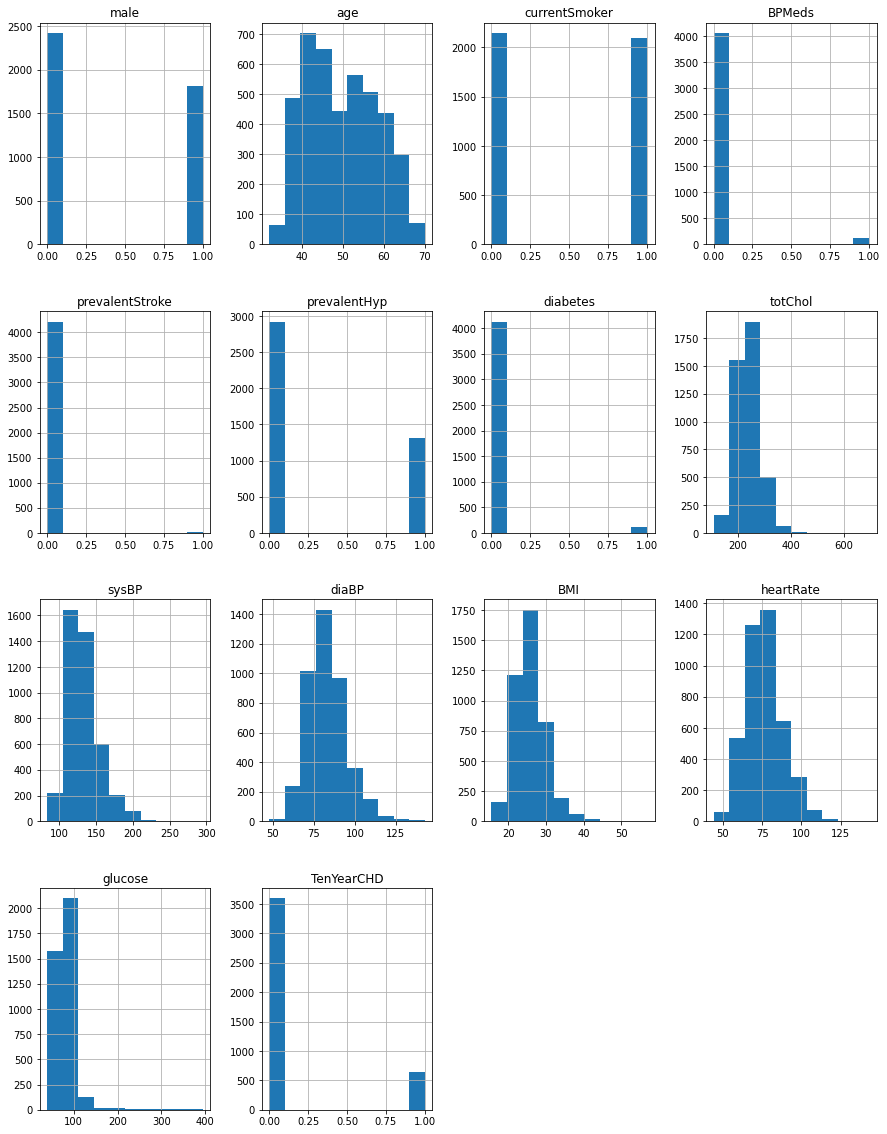

In [7]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)

In [8]:
data.isnull().sum()

male                 0
age                  0
currentSmoker        0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
#mean_cigs_per_day = round(data['cigsPerDay'].mean())
mean_BPMeds= round(data['BPMeds']).mean()
mean_totChol = round(data['totChol']).mean()
mean_BMI = round(data['BMI']).mean()
mean_glucose =round(data['glucose']).mean()
estimated_data =data
#estimated_data['cigsPerDay'].fillna(mean_cigs_per_day,inplace= True)
estimated_data['BPMeds'].fillna(mean_BPMeds,inplace = True)
estimated_data['totChol'].fillna(mean_totChol,inplace =True)
estimated_data['BMI'].fillna(mean_BMI, inplace = True)
estimated_data['glucose'].fillna(mean_glucose, inplace =True)
estimated_data =estimated_data.fillna(0)
print(estimated_data.isnull().sum())

male               0
age                0
currentSmoker      0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [10]:
data.head(10)

,male,age,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,1,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [11]:
data.groupby('TenYearCHD').mean()
#As diaBP,BMI,heartRate have values in similar zones and almost equal to one another for 1 or 0 values for TenYearCHD hence they can be dropped.
#In other words,these 3 have low variance for categoreies of TenYearCHD

,male,age,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,
0,0.410684,48.767668,0.489983,0.023440,0.003895,0.275737,0.019199,235.190202,130.333612,82.160963,25.673333,75.762382,80.802939
1,0.532609,54.145963,0.517081,0.064171,0.017081,0.504658,0.062112,245.267848,143.618789,86.981366,26.520140,76.530327,88.461704


In [12]:
##Defining training and test data and predicting with logistic regression function
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score 
from sklearn.metrics import roc_curve, roc_auc_score

raw_data = data
data = estimated_data
X = data[['male','age','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes','BMI','totChol','sysBP','glucose']]
y = data['TenYearCHD']
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.1,random_state =1)

In [13]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [i for i in X.columns]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [14]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.022 seconds


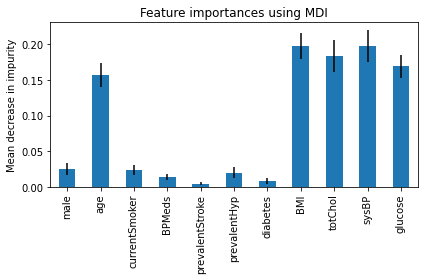

In [15]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [55]:
print(X.columns)
print(sorted(forest_importances))
print(importances)

Index(['BMI', 'sysBP', 'totChol', 'glucose', 'male'], dtype='object')
[0.004507668067608803, 0.008655376641244241, 0.01312556933789036, 0.019930255755973098, 0.023858686887962825, 0.025087694120898032, 0.1569446820709163, 0.16937836561663971, 0.18353698569160865, 0.19735452090965566, 0.19762019489960228]
[0.02508769 0.15694468 0.02385869 0.01312557 0.00450767 0.01993026
 0.00865538 0.19762019 0.18353699 0.19735452 0.16937837]


In [17]:
# show the most important features
import numpy as np
most_important = np.argsort(forest_importances)[::-1][:5]
most_important

glucose      7
sysBP        9
totChol      8
BMI         10
diabetes     1
dtype: int64

In [83]:
raw_data = data
data = estimated_data
X = data[['BMI','sysBP','totChol','glucose','male']] #feature importance columns
#X = data[['male', 'currentSmoker', 'BPMeds', 'prevalentStroke']]
y = data['TenYearCHD']
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.1,random_state =1)
print('Xtrain_size=',X_train.shape)
print('X_test=',X_test.shape)
print('y_train=',y_train.shape)
print('y_test=',y_test.shape)
#model = LogisticRegression(max_iter =1000)
model = LogisticRegression(C=10, max_iter=100000, penalty='l1', solver='liblinear')
model.fit(X_train,y_train)
y_pred =model.predict(X_test)
#printing logistic regression equation
print('Logistic Regression equation, {} + {}'.format(model.coef_ , model.intercept_))

Xtrain_size= (3814, 5)
X_test= (424, 5)
y_train= (3814,)
y_test= (424,)
Logistic Regression equation, [[0.00145175 0.02250688 0.00349816 0.00920137 0.62812452]] + [-6.72615063]


In [84]:
print('accuracy score: {:4f}'.format(accuracy_score(y_test,y_pred)))
print('Precision score: ', precision_score(y_test, y_pred,average='micro'))
print('Recall score: ', recall_score(y_test, y_pred,average='micro'))
#checking AUC under ROC curve
y_score = model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
#print (true_positive_rate,false_positive_rate)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score))

accuracy score: 0.841981
Precision score:  0.8419811320754716
Recall score:  0.8419811320754716
roc_auc_score for Logistic Regression:  0.703969651808698


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


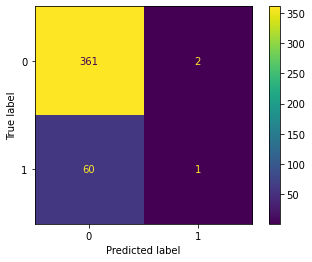

In [74]:
from sklearn.metrics import plot_confusion_matrix as PCM
PCM(model,X_test,y_test)

In [75]:
from sklearn.metrics import classification_report as CR
results = model.predict(X_test)
print(CR(y_test,results))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       363
           1       0.33      0.02      0.03        61

    accuracy                           0.85       424
   macro avg       0.60      0.51      0.48       424
weighted avg       0.78      0.85      0.79       424



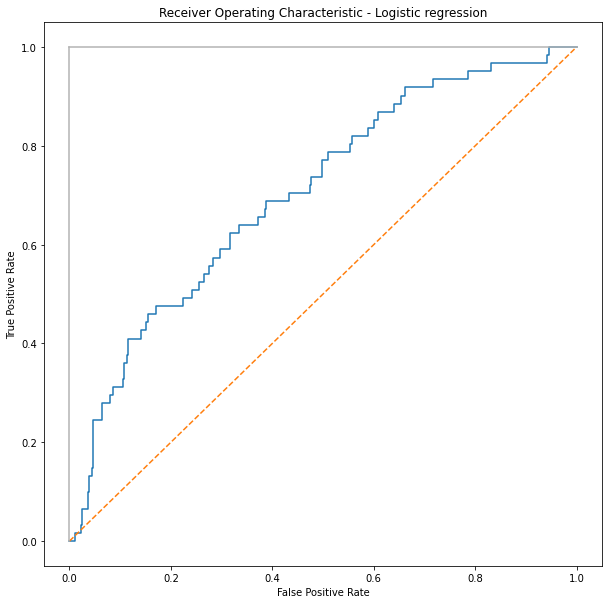

In [85]:
# Plotting ROC Curve
import matplotlib.pyplot as plt
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [86]:
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import learning_curve




y_train = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)



lg = LogisticRegression(C=0.1, max_iter=100000, penalty='l1', solver='liblinear')
# fit
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


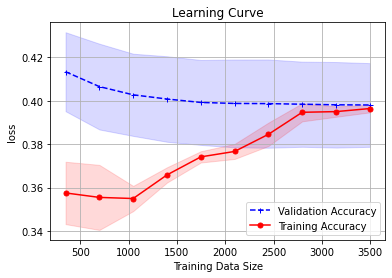

In [24]:
train_sizes, train_scores, test_scores = learning_curve(estimator=lg, X=X_train, y=y_train,
                                                       cv=12, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1,scoring='neg_log_loss')

train_mean = -np.mean(train_scores, axis=1)
train_std = -np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = -np.std(test_scores, axis=1)
#
# Plot the learning curve
#
#train_sizes = [0, 349,  699, 1048, 1398, 1748, 2097, 2447, 2796, 3146]
#plt.ylim([0,1])
plt.plot(train_sizes, test_mean, color='blue', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='blue')
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='red')

plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('loss')
plt.grid()
plt.legend(loc='lower right')
plt.show()


In [25]:
from sklearn.model_selection import GridSearchCV
# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 'C':[0.001,0.009,0.01,0.09,1,5,10,15,25,100]
    }
clf = GridSearchCV(lg,                    
                   param_grid = parameters,   
                   scoring='accuracy'        
) 

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

print(clf.cv_results_)

Tuned Hyperparameters : {'C': 0.009, 'penalty': 'l2'}
Accuracy : 0.8510744643158137
{'mean_fit_time': array([0.00106988, 0.0826911 , 0.00071955, 0.06455994, 0.0007618 ,
       0.06027493, 0.00072775, 0.06398735, 0.00073528, 0.07160907,
       0.00073152, 0.06756787, 0.00073071, 0.06220603, 0.0008018 ,
       0.06737447, 0.00079594, 0.06147385, 0.00073338, 0.06484785]), 'std_fit_time': array([3.79758621e-04, 1.48920408e-02, 8.94152955e-05, 6.88537888e-03,
       1.28864781e-04, 4.53680172e-03, 8.03118354e-05, 6.40764249e-03,
       9.12268122e-05, 8.90283751e-03, 7.69857099e-05, 6.28307582e-03,
       6.80282034e-05, 6.81845542e-03, 1.01774075e-04, 1.79381497e-02,
       1.07885247e-04, 6.53511009e-03, 9.88184469e-05, 1.36685986e-02]), 'mean_score_time': array([0.        , 0.00481434, 0.        , 0.00286794, 0.        ,
       0.00301981, 0.        , 0.00378456, 0.        , 0.00261903,
       0.        , 0.00259991, 0.        , 0.00260186, 0.        ,
       0.00315647, 0.        , 0.00

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver 

In [26]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.839622641509434

#SVM

In [27]:
from sklearn.svm import SVC

In [28]:
from sklearn.model_selection import GridSearchCV

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)

In [29]:
svm_clf.fit(X_train,y_train)
#X_train, X_test,y_train, y_test
svm_clf.best_params_ 

{'C': 0.001, 'gamma': 0.001}

In [30]:
svm_predict = svm_clf.predict(X_test)       

In [31]:
from sklearn.metrics import classification_report as CR
results = svm_clf.predict(X_test)
print(CR(y_test,results))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       363
           1       0.00      0.00      0.00        61

    accuracy                           0.86       424
   macro avg       0.43      0.50      0.46       424
weighted avg       0.73      0.86      0.79       424



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
from sklearn.metrics import accuracy_score

svm_accuracy = accuracy_score(y_test,svm_predict)
print(svm_accuracy)

0.8561320754716981


In [33]:
print('accuracy score: {:4f}'.format(accuracy_score(y_test,svm_predict)))
print('Precision score: ', precision_score(y_test, svm_predict,average='micro'))
print('Recall score: ', recall_score(y_test, svm_predict,average='micro'))
#checking AUC under ROC curve
y_score = svm_clf.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
#print (true_positive_rate,false_positive_rate)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score))

accuracy score: 0.856132
Precision score:  0.8561320754716981
Recall score:  0.8561320754716981
roc_auc_score for Logistic Regression:  0.4260940251998374


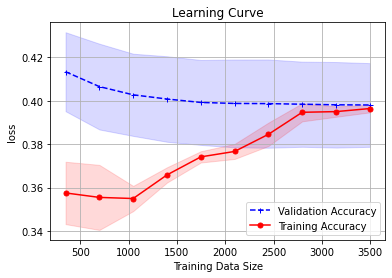

In [34]:
train_sizes, train_scores, test_scores = learning_curve(estimator=lg, X=X_train, y=y_train,
                                                       cv=12, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1,scoring='neg_log_loss')

train_mean = -np.mean(train_scores, axis=1)
train_std = -np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = -np.std(test_scores, axis=1)
#
# Plot the learning curve
#
#train_sizes = [0, 349,  699, 1048, 1398, 1748, 2097, 2447, 2796, 3146]
#plt.ylim([0,1])
plt.plot(train_sizes, test_mean, color='blue', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='blue')
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='red')

plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('loss')
plt.grid()
plt.legend(loc='lower right')
plt.show()

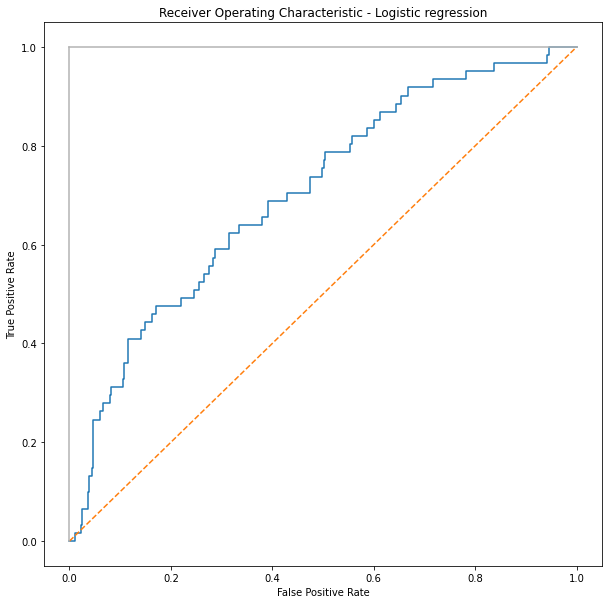